In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
def feature_to_dummy(df, column, drop=False):
    ''' take a serie from a dataframe,
        convert it to dummy and name it like feature_value
        - df is a dataframe
        - column is the name of the column to be transformed
        - if drop is true, the serie is removed from dataframe'''
    tmp = pd.get_dummies(df[column], prefix=column, prefix_sep='_')
    df = pd.concat([df, tmp], axis=1)
    if drop:
        del df[column]
    return df

In [3]:
def getEncoded(test_data,labelencoder_dict,onehotencoder_dict):
    test_encoded_x = None
    for i in range(0,test_data.shape[1]):
        label_encoder =  labelencoder_dict[i]
        feature = label_encoder.transform(test_data.iloc[:,i])
        feature = feature.reshape(test_data.shape[0], 1)
        onehot_encoder = onehotencoder_dict[i]
        feature = onehot_encoder.transform(feature)
        if test_encoded_x is None:
            test_encoded_x = feature
        else:
            test_encoded_x = np.concatenate((test_encoded_x, feature), axis=1)
    return test_encoded_x

In [4]:
MY_PATH = ''
train_data_file = MY_PATH + 'restaurant.csv'
test_data_file = MY_PATH + 'restaurant_test.csv'
predict_data_file = MY_PATH + 'restaurant_predict.csv'

In [5]:
# Column names to be added
column_names=['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est', 'Output']

#read data
train_df=pd.read_csv(train_data_file, names=column_names)

In [6]:
train_df_dtypes_obj = train_df.select_dtypes(['object'])
train_df[train_df_dtypes_obj.columns] = train_df_dtypes_obj.apply(lambda x: x.str.strip())

In [7]:
# mapping yes/no to 1/0
# train_df['Output'] = train_df['Output'].str.strip()
# train_df['Output'] = train_df['Output'].map({'Yes': int(1), 'No': int(0)})

In [8]:
#separateing predictor features(X) and target feature(y)
X_train = train_df.iloc[:,0:10]
y_train = train_df.iloc[:,10]

In [9]:
X_train

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60
2,No,Yes,No,No,Some,$,No,No,Burger,0-10
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30


In [10]:
X_train_dichot =  X_train.loc[:, ["Alt", "Bar", "Fri", "Hun", "Rain", "Res"]]
X_train_nominal = X_train.loc[:, ["Pat", "Price", "Type", "Est"]]

In [11]:
# label Encoding the dichotomous variables
X_train_dichot_en = X_train_dichot.apply(LabelEncoder().fit_transform)

In [12]:
# onehot encoding the nominal categorical variables
labelencoder_dict = {}
onehotencoder_dict = {}
X_train_nominal_en = None
for i in range(0, X_train_nominal.shape[1]):
    label_encoder = LabelEncoder()
    labelencoder_dict[i] = label_encoder
    feature = label_encoder.fit_transform(X_train_nominal.iloc[:,i])
    feature = feature.reshape(X_train_nominal.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    onehotencoder_dict[i] = onehot_encoder
    if X_train_nominal_en is None:
        X_train_nominal_en = feature
    else:
        X_train_nominal_en = np.concatenate((X_train_nominal_en, feature), axis=1)

In [13]:
# concatenating te two arrays
X_train_dichot_en = X_train_dichot_en.to_numpy()
X_train = np.concatenate((X_train_dichot_en, X_train_nominal_en),axis=1)

In [14]:
X_train

array([[1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [15]:
feature_names=['Alt', 'Bar', 'Fri', 'Hun', 'Rain', 'Res', 'Pat_Full', 'Pat_None', 'Pat_Some', 'Price_$', 'Price_$$', 'Price_$$$', 'Type_Burger', 'Type_French', 'Type_Italian', 'Type_Thai', 'Est_0-10', 'Est_10-30', 'Est_30-60', 'Est_>60']

In [16]:
# label encoding the y_train
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

In [17]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

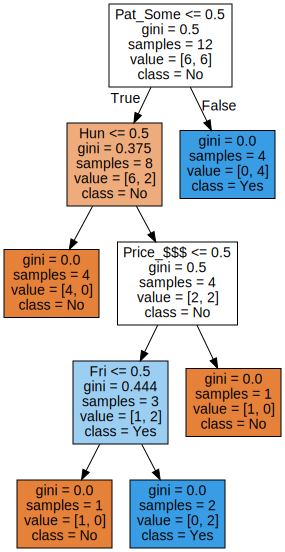

In [19]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=['No','Yes'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [20]:
# f = graphviz.Digraph('finite_state_machine', filename='dt_visualization.gv')
# f.attr(rankdir='LR', size='8,5')

# f.attr('node', shape='square')
# f.node('LR_0', 'hello')
# f.node('LR_3')
# f.node('LR_4')
# f.node('LR_8')

# f.attr('node', shape='square')
# f.edge('LR_0', 'LR_2', label='SS(B)')
# f.edge('LR_0', 'LR_1', label='SS(S)')
# f.edge('LR_1', 'LR_3', label='S($end)')
# f.edge('LR_2', 'LR_6', label='SS(b)')
# f.edge('LR_2', 'LR_5', label='SS(a)')
# f.edge('LR_2', 'LR_4', label='S(A)')
# f.edge('LR_5', 'LR_7', label='S(b)')
# f.edge('LR_5', 'LR_5', label='S(a)')
# f.edge('LR_6', 'LR_6', label='S(b)')
# f.edge('LR_6', 'LR_5', label='S(a)')
# f.edge('LR_7', 'LR_8', label='S(b)')
# f.edge('LR_7', 'LR_5', label='S(a)')
# f.edge('LR_8', 'LR_6', label='S(b)')
# f.edge('LR_8', 'LR_5', label='S(a)')

# f.view()

In [21]:
#read unseen data
predict_df=pd.read_csv(predict_data_file, names=column_names)
predict_df = predict_df.drop('Output', axis=1) 

In [22]:
predict_df_dtypes_obj = predict_df.select_dtypes(['object'])
predict_df[predict_df_dtypes_obj.columns] = predict_df_dtypes_obj.apply(lambda x: x.str.strip())

In [23]:
predict_df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est
0,No,No,No,No,None,$$$,No,No,Thai,0-10
1,No,No,No,No,None,$$$,Yes,No,Burger,10-30
2,No,No,No,No,None,$,Yes,No,French,0-10


In [24]:
predict_df_nominal = predict_df.loc[:, ["Pat", "Price", "Type", "Est"]]
predict_df_dichot =  predict_df.loc[:, ["Alt", "Bar", "Fri", "Hun", "Rain", "Res"]]

In [25]:
# label Encoding the dichotomous variables
predict_df_dichot_en =predict_df_dichot.apply(LabelEncoder().fit_transform)

In [26]:
predict_df_nominal_en = getEncoded(predict_df_nominal, labelencoder_dict, onehotencoder_dict)

In [27]:
predict_df_dichot_en = predict_df_dichot_en.to_numpy()
X_predict = np.concatenate((predict_df_dichot_en, predict_df_nominal_en),axis=1)

In [28]:
X_predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0.]])

In [29]:
y_pred = clf.predict(X_predict)

In [31]:
y_pred

array([0, 0, 0])